## LendingClubCaseStudy


The objective of this CaseStudy is to apply EDA methods to understand the attributes that impact the tendency of `LoanDefaults`.

#### Steps in Analysis:

- EDA : 
 1. Data Sourcing.
 2. Data Cleaning.
 3. Univariate Analysis.
 4. Bivariate Analysis.
 5. Multivariate Analysis.


- Insights/Driving Factors.
    
    

In [1]:
#Import the necessary libraries for our DataAnalysis
import warnings
warnings.filterwarnings("ignore")               #to ignore warning messages while execution   

import numpy as np, pandas as pd                #for dataframes,operations    
import matplotlib.pyplot as plt, seaborn as sns #for plots
from datetime import datetime                   #for time related operations/anlysis
import seaborn as sns
pd.set_option('display.max_colwidth', -1)       #to display the entire value of the cell

### 1. DataSourcing

In [2]:
#Data is already provided, importing the data to DataFrame, Since it is big file with various DataTypes set low_memory=False
loan_data=pd.read_csv(r'C:\Users\Sumanth Sarva\Documents\IIITB\LendingClub\loan\loan.csv',low_memory=False)

In [3]:
#DataFrame shape
loan_data.shape

(39717, 111)

### 2. DataCleaning

In [4]:
list(loan_data.columns.values) #listing the column names

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
# There are many columns let's see if there are empty columns
loan_data.columns[loan_data.isnull().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

#### 2.1.1 Dropping empty columns

In [6]:
#dropping all the empty columns
loan_data.dropna(how='all',axis = 1 , inplace = True)

#table shape after dropping
loan_data.shape


(39717, 57)

In [7]:
#lets the see percentage of missing values in the remaining columns, sorted and listed by top 10
round( (loan_data.isnull().sum()/len(loan_data) * 100).sort_values(ascending=False),0).head(10)


next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                     6.0 
emp_length                    3.0 
pub_rec_bankruptcies          2.0 
last_pymnt_d                  0.0 
chargeoff_within_12_mths      0.0 
collections_12_mths_ex_med    0.0 
dtype: float64

#### 2.1.2 Dropping columns with more percentage of missing values

In [8]:
#lets drop the top 3 columns as they are not using considering the number of missing values.
loan_data.drop(["next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq"],axis=1,inplace=True)

In [9]:
#Listing the remaining column names
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### 2.1.3 Dropping columns which have only `One Value` 

In [10]:
print(loan_data.nunique())
print(loan_data.shape)

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths              

In [11]:
#dropping columns with only one unique value

to_drop  = loan_data.nunique()                            #stroring all columns unique count to to_drop 
to_drop  = to_drop.loc[to_drop.values==1].index           #getting column indices where unique count is 1
loan_data.drop(to_drop, inplace=True, axis=1)             #dropping columns in the list to_drop


In [12]:
loan_data.shape

(39717, 45)

#### 2.1.4 Dropping columns that are `text/descriptions`

##### Lets observe `url` and `id` columns

In [13]:
loan_data.loc[[1,2,3,4,5],['id','url']]

,id,url
1,1077430,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
2,1077175,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
3,1076863,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863
4,1075358,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358
5,1075269,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269


Here we can conclude that either `url` and `id` columns are unique. (url column is just concatenation of string and id)
They dont contribute for our analysis.
We have indexing to identify the rows.


so let's drop url and id column.

In [14]:
loan_data.drop(['url','id'], inplace =True, axis=1)    #dropping url and id column 

#### 2.1.5  We can drop other columns that are not useful for our analysis 
   `member_id` we already have index column which is unique, we dont need it

   `desc`, `emp_title` Irrelevant for our analysis


   Let's go on and drop other `Costumer_Behavioural` columns that dont contribute to analysis


In [15]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
#Columns that dont contribute our analysis

#revol_bal --> is not necessary as it is total revolving credit, we calculate from revol util.
#out_prncp --> Remaining outstanding principal for total amount funded. Not required.
#out_prncp_inv -->Remaining outstanding principal for portion of total amount funded by investors. Not required.
#total_pymnt,total_pymnt_inv,total_rec_prncp --> we dont need recovery amount that is paid to bank
#total_rec_int,total_rec_late_fee  --> we dont need fine amount that is paid to bank.
#recoveries --> it is gross recovery, not required.
#collection_recovery_fee --> it is post charge off collection fee, not required.
#earliest_cr_line --> We dont need oldest credit line for insights
#delinq_2yrs --> values  are inconsistent.
#open_acc, total_acc --> Not necessary to check open credit lines.
#last_pymnt_d, last_pymnt_amn, --> it belongs to current loans so not required.
#pub_rec -->Number of derogatory records are useful but values are inconsistent.
#last_credit_pull_d --> Doesnt affect our target variable.
#inq_last_6mths --> inquiry info is not relevant.
#member_id, desc, funded_amnt,emp_title,title --> reasons mentioned above
#zip_code --> state column is retained, zip-code is too specific and not logical in business perspective.


In [17]:
#dropping all unnecessary columns
loan_data.drop(['revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries','installment',
       'collection_recovery_fee','earliest_cr_line','delinq_2yrs','total_acc','open_acc', 'last_pymnt_d', 
        'last_pymnt_amnt','pub_rec', 'last_credit_pull_d','inq_last_6mths',
        'member_id','desc','funded_amnt','zip_code',
      'emp_title','title'],inplace=True, axis=1)

In [18]:
loan_data.shape

(39717, 17)

#### Columns left in our Loan Table

In [19]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_util', 'pub_rec_bankruptcies'],
      dtype='object')

#### 2.1.6 Fixing rows

In [20]:
#Lets check and delete if there are no null rows
loan_data.isnull().all(axis=1).sum()

0

In [21]:
# Here there are 3 types of values for loan_status
print(loan_data.loan_status.unique())
loan_data.loan_status.value_counts()

['Fully Paid' 'Charged Off' 'Current']


Fully Paid     32950
Charged Off    5627 
Current        1140 
Name: loan_status, dtype: int64

#### We can't get any insights from the applicants who's loan status is 'current'
so let's drop the rows where the loan status is `current`

In [22]:
#dropping the rows where loan_status is current 
loan_data.drop(loan_data[loan_data.loan_status =='Current'].index, inplace=True)


In [23]:
print(loan_data.shape) #shape after removing LoanStatus current rows

(38577, 17)


#### 2.2 Standardising data

In [24]:
#data types of the values
loan_data.dtypes
#lets convert them to proper data type after we remove special characters from all the columns,if any!

loan_amnt               int64  
funded_amnt_inv         float64
term                    object 
int_rate                object 
grade                   object 
sub_grade               object 
emp_length              object 
home_ownership          object 
annual_inc              float64
verification_status     object 
issue_d                 object 
loan_status             object 
purpose                 object 
addr_state              object 
dti                     float64
revol_util              object 
pub_rec_bankruptcies    float64
dtype: object

In [25]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.70%,0.0
1,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.40%,0.0
2,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98.50%,0.0
3,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21%,0.0
5,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,28.30%,0.0


#### Lets remove `%` symbol from the `int_rate` and `revol_util` column names

In [26]:
#removing % symbol from 'int_rate'
loan_data["int_rate"]=loan_data["int_rate"].apply(lambda x: float(x.replace('%','')))

#removing % symbol from 'revol_util'
loan_data["revol_util"]=loan_data["revol_util"].str.replace('%','').astype(float)



In [27]:
#printing first 3 rows and int_rate and revol_util columns to see if '%' is removed.
loan_data.loc[[0,1,2],['int_rate', 'revol_util']].head()

,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5


#### Lets rename term into `term_in_months` and remove 'Months' in term column.

In [28]:
#Rename 'term'  into 'term_in_months'
loan_data.rename(columns = {'term':'term_in_months'}, inplace = True)

#remove 'months' from 'term_in_months' column
loan_data["term_in_months"]=loan_data["term_in_months"].apply(lambda x: x.replace('months',''))

In [29]:
#printing first 2 rows of loan_data
loan_data.head()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.7,0.0
1,2500,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.4,0.0
2,2400,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,98.5,0.0
3,10000,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,21.0,0.0
5,5000,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,28.3,0.0


#### Lets rename emp_length to `emp_exp_in_years` and standardise the values by removing the special characters(<,+,..) 

In [30]:
#Rename 'emp_length'  into 'emp_experience'
loan_data.rename(columns = {'emp_length':'emp_exp_in_years'}, inplace = True)

#Remove the special characters from emp_exp_in_years
loan_data['emp_exp_in_years']=loan_data['emp_exp_in_years'].str.extract('(\d+)', expand=False)

#They are in string format let replace nan with '0' and convert them to int
loan_data['emp_exp_in_years']=loan_data['emp_exp_in_years'].fillna(0).astype(int)
print(loan_data.emp_exp_in_years.unique())

#For more accurate analysis lets replace 0 with median
loan_data['emp_exp_in_years']=loan_data['emp_exp_in_years'].replace(0,loan_data['emp_exp_in_years'].median())

[10  1  3  8  9  4  5  6  2  7  0]


In [31]:
loan_data.head(2)

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,grade,sub_grade,emp_exp_in_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,revol_util,pub_rec_bankruptcies
0,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,83.7,0.0
1,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,9.4,0.0


In [32]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term_in_months', 'int_rate', 'grade',
       'sub_grade', 'emp_exp_in_years', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'revol_util', 'pub_rec_bankruptcies'],
      dtype='object')

In [33]:
#lets convert issue_d to time series format and create issued_year and issued_month

loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issued_month']=loan_data['issue_d'].dt.month
loan_data['issued_year']=loan_data['issue_d'].dt.year

# lets drop 'issue_d' column
loan_data.drop(loan_data[["issue_d"]],axis=1,inplace=True)

#### Lets rename the following columns for better understanding:
issue_d to `issue_date`

dti to `dti_ratio`

revol_util to `credit_utilisation`


In [34]:
#renaming column names
loan_data.rename(columns = {'emp_length':'emp_exp_in_years', 'dti' :'debt_to_income_ratio',  
                            'revol_util':'credit_utilisation' }, inplace = True)


In [35]:
# lets check the percentage of missing values in the columns no
round(100*(loan_data.isnull().sum()/len(loan_data.index)) , 2)

loan_amnt               0.00
funded_amnt_inv         0.00
term_in_months          0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_exp_in_years        0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
debt_to_income_ratio    0.00
credit_utilisation      0.13
pub_rec_bankruptcies    1.81
issued_month            0.00
issued_year             0.00
dtype: float64

#### `credit_utilisation` and `pub_rec_bankruptcies` have null values, lets replace them with their `median_value`

In [36]:
#Replace the two columns null values with median:
loan_data.pub_rec_bankruptcies.fillna(loan_data['pub_rec_bankruptcies'].median(),inplace=True)
loan_data.credit_utilisation.fillna(loan_data['credit_utilisation'].median(),inplace=True)

In [37]:
# lets see the final data
loan_data.head()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,grade,sub_grade,emp_exp_in_years,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,debt_to_income_ratio,credit_utilisation,pub_rec_bankruptcies,issued_month,issued_year
0,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,83.7,0.0,12,2011
1,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,9.4,0.0,12,2011
2,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,98.5,0.0,12,2011
3,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,21.0,0.0,12,2011
5,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,28.3,0.0,12,2011


In [38]:
loan_data.describe().round(2)

,loan_amnt,funded_amnt_inv,int_rate,emp_exp_in_years,annual_inc,debt_to_income_ratio,credit_utilisation,pub_rec_bankruptcies,issued_month,issued_year
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,11047.03,10222.48,11.93,5.03,68777.97,13.27,48.70,0.04,7.11,2010.31
std,7348.44,7022.72,3.69,3.36,64218.68,6.67,28.35,0.20,3.41,0.88
min,500.00,0.00,5.42,1.00,4000.00,0.00,0.00,0.00,1.00,2007.00
25%,5300.00,5000.00,8.94,2.00,40000.00,8.13,25.20,0.00,4.00,2010.00
50%,9600.00,8733.44,11.71,4.00,58868.00,13.37,49.10,0.00,7.00,2011.00
75%,15000.00,14000.00,14.38,9.00,82000.00,18.56,72.20,0.00,10.00,2011.00
max,35000.00,35000.00,24.40,10.00,6000000.00,29.99,99.90,2.00,12.00,2011.00


In [39]:
#lets have a final check to confirm we removed the null values
round(100*(loan_data.isnull().sum()/len(loan_data.index)) , 2)

loan_amnt               0.0
funded_amnt_inv         0.0
term_in_months          0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_exp_in_years        0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
debt_to_income_ratio    0.0
credit_utilisation      0.0
pub_rec_bankruptcies    0.0
issued_month            0.0
issued_year             0.0
dtype: float64

In [40]:
#making deep copy for safety purpose
safedata=loan_data.copy(deep= True)

### 3. Univariate Analysis

#### Lets study the distribution of each column which helps in understanding the distribution and in removing the outliers, if any. 

#### `loan_amnt:`

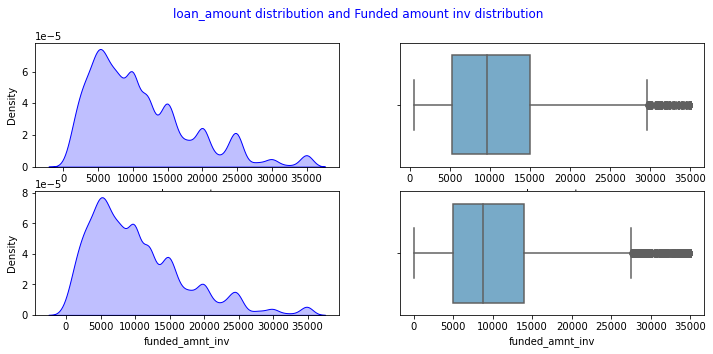

In [41]:
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])

#subplot 1
plt.subplot(2,2,1)         
#Create a kdeplot for loan_amount applied
sns.kdeplot(loan_data.loan_amnt, shade=True, color="b") 
#subplot 2
plt.subplot(2,2,2)
#Create a boxplot for loan_amount applied
sns.boxplot(loan_data.loan_amnt, palette="Blues") 

#subplot 3
plt.subplot(2,2,3) 
#Create a kdeplot for funded_amount_inv
sns.kdeplot(loan_data.funded_amnt_inv,shade=True, color="b")
#subplot 4
plt.subplot(2,2,4) 
#Create a boxplot for funded_amount_inv
sns.boxplot(loan_data.funded_amnt_inv, palette="Blues")

            
# Plot Header
plt.suptitle("loan_amount distribution and Funded amount inv distribution",
             fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'blue'})
plt.show()

#### Observation:


Here we understand that both the `loan_amnt` applied and `funded_amnt_inv` are similar.
So for our analysis we consider `funded_amnt_inv` for ease of getting insights.

Findings in `funded_amnt_inv`Boxplot:
- Most of the applicants are funded with 5000 to 15000.
- There are less number of people who are funded more than 28000.


#### `annual_inc:`

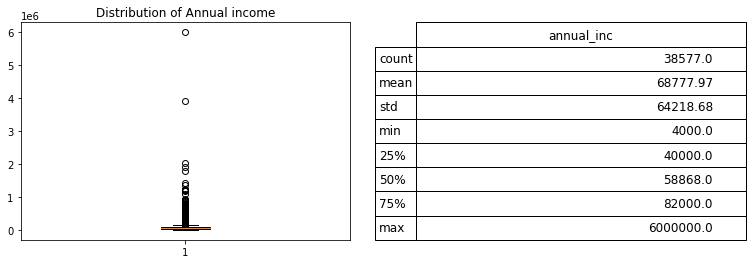

In [42]:
# lets understand annual_inc column:


# lets use subplots concept to see distribution and description side by side:
#figure is name of total plot
fig = plt.figure(figsize=(13,4))

#subplot_1 to create boxplot of annual inc
subplot_1 = fig.add_subplot(121)
subplot_1.boxplot(loan_data.annual_inc )
subplot_1.set_title('Distribution of Annual income')

#sal_desc is description of annual_sal rounded to 2 decimals.
sal_desc = loan_data.annual_inc.describe().to_frame().round(2)

#subplot_2 for creation table for sal_desc
subplot_2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
subplot_2.axis('off')
#creating table and adding subplot2 values:
annual_inc_table = subplot_2.table(cellText = sal_desc.values, rowLabels = sal_desc.index, 
                                   bbox=bbox, colLabels=sal_desc.columns)
annual_inc_table.auto_set_font_size(False)
annual_inc_table.set_fontsize(font_size)

Here we understand that both the `annual_inc` has outliers which affect the analysis and hence should be removed.


In [43]:
#lets decribe the annual_inc for different Quartiles:
loan_data.annual_inc.describe(percentiles = [0.1,0.2,0.25,0.5,0.6,0.75,0.9,0.95,0.98,0.99]).round(2)

count    38577.00  
mean     68777.97  
std      64218.68  
min      4000.00   
10%      30000.00  
20%      37196.16  
25%      40000.00  
50%      58868.00  
60%      65004.00  
75%      82000.00  
90%      115000.00 
95%      140004.00 
98%      187000.00 
99%      234144.00 
max      6000000.00
Name: annual_inc, dtype: float64

In [44]:
#Outlier Treatment: removing the outilers after 99 Quartile
print("Loan_data shape before outlier treatment: ",loan_data.shape)
loan_data = loan_data[loan_data["annual_inc"] < loan_data["annual_inc"].quantile(0.99)]
print("Loan_data shape before outlier treatment: ",loan_data.shape)
#Checking the values for annual income(annual_inc) using describe()


Loan_data shape before outlier treatment:  (38577, 18)
Loan_data shape before outlier treatment:  (38191, 18)


lets create box plot and distribution desc in a table to compare:


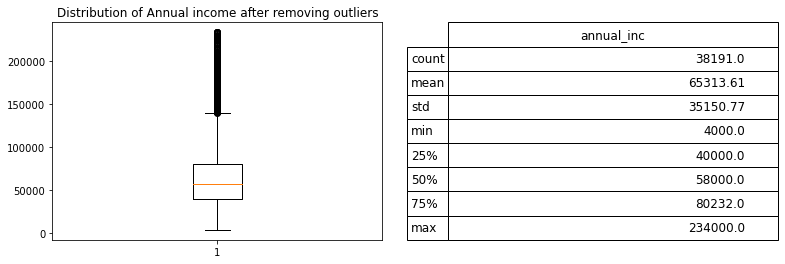

In [45]:
#fig_2 is name of total plot
fig_2 = plt.figure(figsize=(13,4))

#subplot_1 to create boxplot of annual inc
subplot_1 = fig_2.add_subplot(121)
subplot_1.boxplot(loan_data.annual_inc)
subplot_1.set_title('Distribution of Annual income after removing outliers')

#sal_desc is description of annual_sal rounded to 2 decimals.
sal_desc = loan_data.annual_inc.describe().to_frame().round(2)

#subplot_2 for creation table for sal_desc
subplot_2 = fig_2.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
subplot_2.axis('off')
#creating table and adding subplot2 values:
annual_inc_table = subplot_2.table(cellText = sal_desc.values, rowLabels = sal_desc.index, 
                                   bbox=bbox, colLabels=sal_desc.columns)
annual_inc_table.auto_set_font_size(False)
annual_inc_table.set_fontsize(font_size)

#### `emp_exp_in_years:`

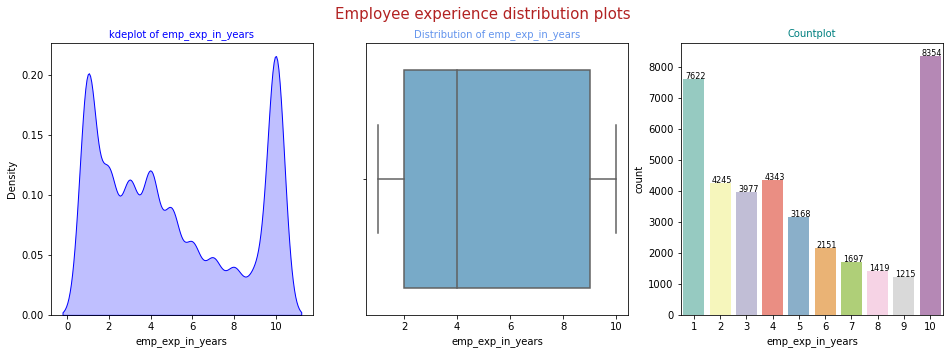

In [46]:
#Lets understand emp_exp_in_years in years with plots
#Increasing the figure size of the plot 
plt.figure(figsize=[16,5])

#subplot 1
plt.subplot(1,3,1)         
#Create a kdeplot for emp_exp_in_years applied
sns.kdeplot(loan_data.emp_exp_in_years, shade=True, color="blue") 
plt.title("kdeplot of emp_exp_in_years",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'blue'})

#subplot 2
plt.subplot(1,3,2)
#Create a boxplot for emp_exp_in_years applied
sns.boxplot(loan_data.emp_exp_in_years, palette="Blues") 
plt.title("Distribution of emp_exp_in_years",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'cornflowerblue'})

#subplot 3
plt.subplot(1,3,3)
#Create a countplot for emp_exp_in_years applied
ax= sns.countplot(loan_data.emp_exp_in_years,palette = "Set3") 
plt.title("Countplot",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'teal'})
#lets show valuecounts on top of each patch
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.08, p.get_height()), color='Black', size=8)         
# Plot Header
plt.suptitle("Employee experience distribution plots",size=15, color='firebrick')
#plot the final countplot
plt.show()

#### Observation:

By the above three graphs we can infer that:
 - Employees experience median is 4 years.
 - Also most of the employees who took loan are 10/10+ years experienced and <2 years exp employees take second place.
 


#### `Grade: `

Performing univariate analysis on `grade` column is sufficient, 

We can skip performing it on `sub_grade` because its like performing `Binned Univariate Analysis` on `Grade`


B    11581
A    9977 
C    7753 
D    5027 
E    2610 
F    954  
G    289  
Name: grade, dtype: int64


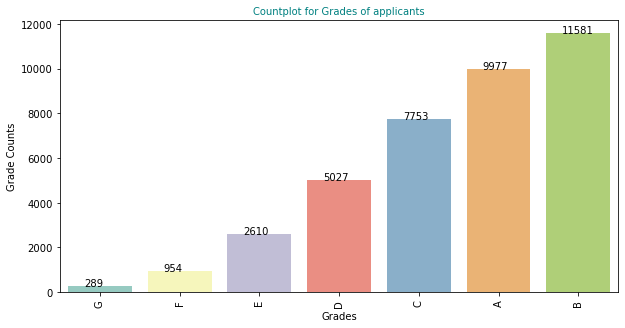

In [47]:
#Lets understand the distribution of Grade column and sub_grade:

# Grade column can be understood with valuecounts method but lets use visualization with valuecounts for better understanding.
print(loan_data.grade.value_counts())

#lets plot countplot with seaborn in ascending order:
plt.figure(figsize=[10,5])
 
order=loan_data.grade.value_counts(ascending=True).index    #lets plot the purpose by order of ascending values.
ax = sns.countplot(loan_data.grade,palette = "Set3",order=order) #seaborn countplot in order we want
plt.title("Countplot for Grades of applicants",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'teal'})
plt.xlabel("Grades")
plt.ylabel("Grade Counts")
plt.xticks(rotation=90) #to see the x ticks properly without overlap

#lets indicate count on each patch of the countplot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='Black', size=10)

#plotting the final countplot
plt.show()

#### Observation:

    

From the two charts we can infer that:
- Most loans sanctioned are from Grade B, A followed by C.
- Very less perrcentage of loans are disbursed to grade G,F applicants.


#### `purpose:`

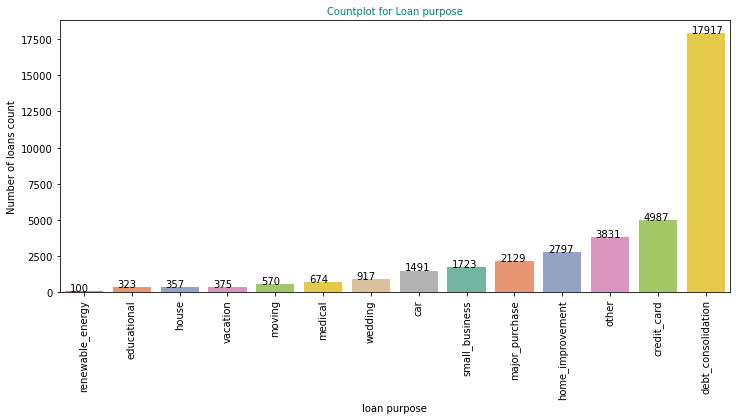

In [48]:
#Now lets study loan purpose column
plt.figure(figsize=[12,5])

order=loan_data.purpose.value_counts(ascending=True).index    #lets plot the purpose by order of ascending values.
ax=sns.countplot(loan_data.purpose,palette = "Set2",order=order) #seaborn countplot in order we want
plt.title("Countplot for Loan purpose",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'teal'})
plt.xlabel("loan purpose")
plt.ylabel("Number of loans count")
plt.xticks(rotation=90) #to see the x ticks properly without overlap

#lets indicate count on each patch of the countplot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), color='Black', size=10)
#plotting the final countplot
plt.show()

#### Observation:
Its clear that most of the Loans are taken towards debt consolidation.

(Debt_consolidation is taken to combine all debts/payables into one bill to avoid the hassle of paying multiple bills at high interest rate)

#### `home_ownership`

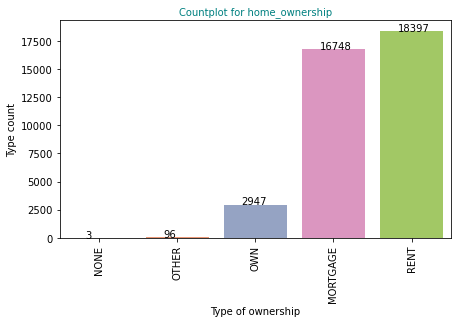

In [49]:
#Lets study the values of home_ownership with countplot

order=loan_data.home_ownership.value_counts(ascending=True).index    #lets plot the home_ownership by order of ascending values.
plt.figure(figsize=[7,4])                                            #To enlarge the plot
ax=sns.countplot(loan_data.home_ownership,palette = "Set2",order=order) #seaborn countplot in order we want
plt.title("Countplot for home_ownership",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'teal'})
plt.xlabel("Type of ownership")
plt.ylabel("Type count")
plt.xticks(rotation=90) #to see the x ticks properly without overlap

#lets indicate count on each patch of the countplot
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.22, p.get_height()), color='Black', size=10)
#plotting the final countplot
plt.show()

#### Obervation:

So we can conclude that 
- `Rent` payers and people with `Mortgage` are highest among the applicants
- `Own` and `Other` category people are considerably less in the list of Loan applicants.

#### `Addr_state`

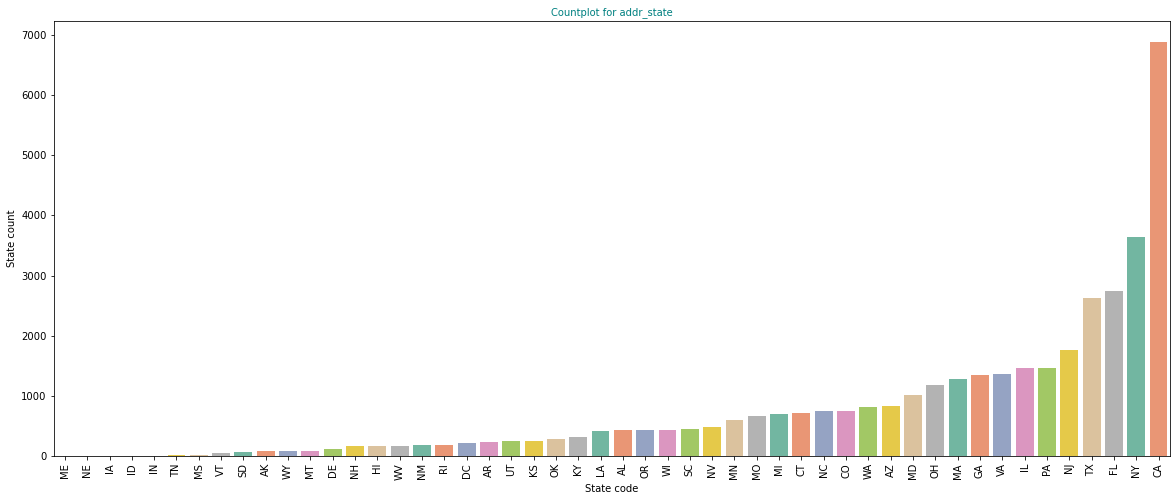

In [50]:
#Lets study the values of addr_state with countplot

order=loan_data.addr_state.value_counts(ascending=True).index    #lets plot the addr_state by order of ascending values.
plt.figure(figsize=[20,8])                                            #To enlarge the plot
ax=sns.countplot(loan_data.addr_state,palette = "Set2",order=order) #seaborn countplot in order we want
plt.title("Countplot for addr_state",fontdict={'fontsize': 10, 'fontweight' : 6, 'color' : 'teal'})
plt.xlabel("State code")
plt.ylabel("State count")
plt.xticks(rotation=90) #to see the x ticks properly without overlap

plt.show()

#### Obervation:

- We understand that most applicants are from `CA`, `NY` driving majority of business to the banks.

But seeing things from business perspective location may not be a big factor for getting insights. 

[Lets perform multivariate analsysis, later in the session and conclude]

#### Observation:
- This variable follows binomial distribution.
- we see that few people have 2-4 credit lines and 12-19 credit lines.
- More people have credit lines in the range 5-11

### 4.Bivariate analyis:

#### Bivariate Analysis is used to find the relationship between two variables.

Lets perform bivariate analysis on few sets of variables and derive insights

In [51]:
#Before we start and perform the analysis, lets derive some columns from the existing columns and bin them
#It helps us understand the behaviour or relationship of the variable.

# categorise interest rates 
loan_data['int_rate_category'] = pd.cut(loan_data['int_rate'], [0, 5, 10, 15, 20, np.inf], 
                                        labels=['0-5%', '5-10%', '10-15%', '15-20%', '+20%'])

# categorise funded amounts disbursed
loan_data['funded_amnt_category'] = pd.cut(loan_data.funded_amnt_inv, [0, 7000, 14000, 21000, 28000, np.inf],
                                           labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '+28000'])

# categorise annual incomes 
loan_data["annual_inc_category"]=pd.cut(loan_data['annual_inc'],  [0, 25000, 50000, 75000, 100000,np.inf], 
                                        labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above'])
# categorise revol_util 
loan_data['credit_utilisation_category'] = pd.cut(loan_data['credit_utilisation'], [0, 20, 40, 60, 80, np.inf], 
                                          labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

# categorise debt_to_income_ratio
loan_data['debt_to_income_ratio_category'] = pd.cut(loan_data['debt_to_income_ratio'], [0, 5, 10, 15, 20, np.inf], 
                                             labels=['0-5%', '5-10%', '10-15%', '15-20%', '+20%'])


#### - Our motto is to find the customers who are likely to charge off.
#### - So we perform bivariate analysis on `loan_status vs rest of the columns`
#### - Since we perform the plots for each bivariate, Lets create a function and use it whenever we require


In [52]:
# This function takes the numerical column variable and size of the plot as input 
# performs the calculation against the loan_status categorical variables
#returns the percentage of people who charged off and paid completely categorised againt the input variable

def plotter(column,a=(12,6),c=('darkseagreen','cadetblue')):        #a,c are default arguments, can pass other values if needed
    table= pd.crosstab(column,loan_data['loan_status'])             #create a table with input and loan_status 
    table['sum'] = table['Charged Off'] + table['Fully Paid']       #sum required to calculate percentage 
    table['charged_off %'] = round((table['Charged Off']/table['sum'])*100, 2)## calculating percentage of the two status
    table['fully_paid %'] = round((table['Fully Paid']/table['sum'])*100, 2)  ###values vs input column values 
    table.drop(columns=['Charged Off', 'Fully Paid', 'sum'], inplace=True)    #remove 'Charged Off', 'Fully Paid', 'sum'
    print(table.sort_values(by='charged_off %'))
    table.sort_values(by='charged_off %').plot.bar(figsize=a,  title=column.name.title()+' vs Loan Status', color=c)
    plt.title(column.name.title()+' vs Loan Status\n', fontdict={'fontsize': 16, 'fontweight' : 4, 'color' : 'maroon'})
    plt.xlabel(column.name.title(), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
    plt.ylabel("Loan status Percentages", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'black'})
    #display the plot
    plt.show()

### `loan_amount_funded category` vs `Loan_status`

loan_status           charged_off %  fully_paid %
funded_amnt_category                             
7000-14000            13.36          86.64       
0-7000                13.90          86.10       
14000-21000           16.79          83.21       
21000-28000           17.64          82.36       
+28000                22.29          77.71       


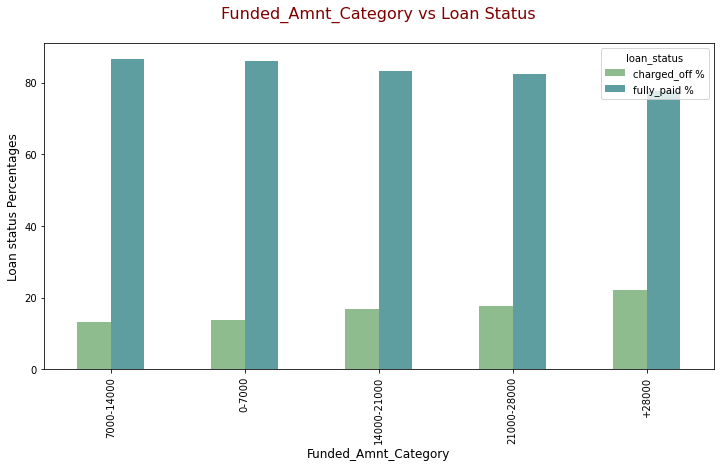

In [53]:
plotter(loan_data.funded_amnt_category)  #funded_amnt_category is parameter we perform bivariate on.

#### Observation:
- If the amount funded to the individual increases, charged-off percent increases
- Likewise, fully_paid percentage drops.

### `annual_inc_category` vs `loan_status`

loan_status          charged_off %  fully_paid %
annual_inc_category                             
100000 and above     10.78          89.22       
75000-100000         12.19          87.81       
50000-75000          14.45          85.55       
25000-50000          16.55          83.45       
0-25000              19.14          80.86       


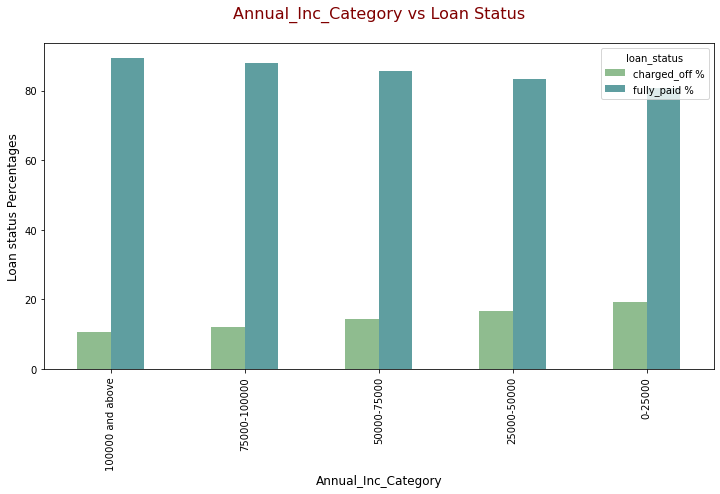

In [54]:
plotter(loan_data.annual_inc_category)  #First parameter is variable we perform bivariate on & second is size of graph

#### Observation:
- The more the income of the applicant the less he is likely to charge-off.
- Likewise, less income applicants, relatively, charged-off more.

### `int_rate_category` vs `loan_status`


loan_status        charged_off %  fully_paid %
int_rate_category                             
5-10%              6.75           93.25       
10-15%             14.89          85.11       
15-20%             24.92          75.08       
+20%               39.08          60.92       


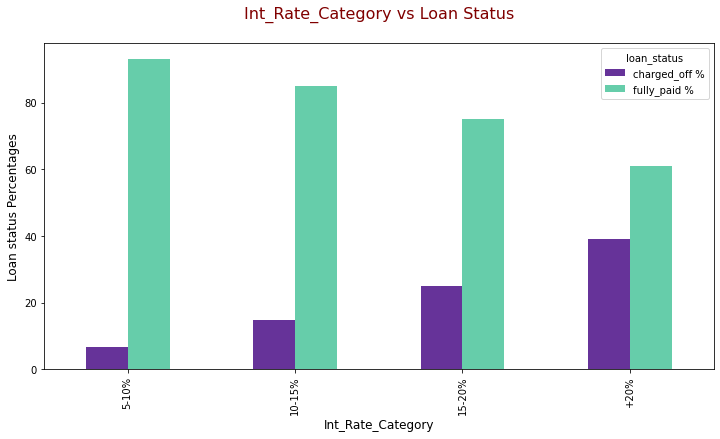

In [55]:
plotter(loan_data.int_rate_category,(12,6),('rebeccapurple','mediumaquamarine')) 

#### Observation:
- Smaller interest rates bring more healthy recovery ratios.
- The Higher the interest rate the more the charged-off percentage

### `Grade` vs `loan_status`

loan_status  charged_off %  fully_paid %
grade                                   
A            6.02           93.98       
B            12.21          87.79       
C            17.31          82.69       
D            22.12          77.88       
E            26.97          73.03       
F            32.70          67.30       
G            34.26          65.74       


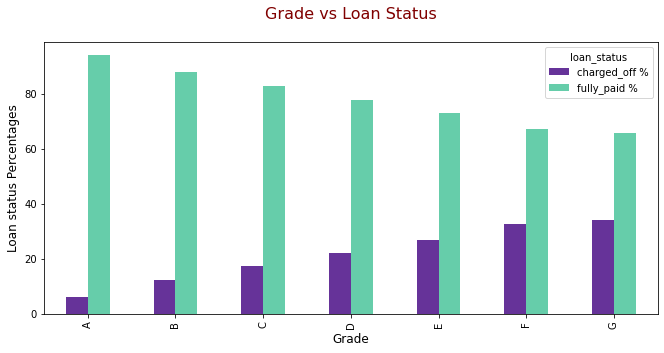

In [56]:
plotter(loan_data.grade,(11,5),('rebeccapurple','mediumaquamarine'))

#### Observation:
The distribution is fair, Considering that grades are given based on the credit_score:
- The logic stands here, It is safe to lend to 'A' category applicant.
- The charge-off ratio increases as the grade increases from A-B-C-D-E-F-G.

### `credit_utilisation_category` vs `loan_status`


loan_status                  charged_off %  fully_paid %
credit_utilisation_category                             
0-20%                        9.20           90.80       
20-40%                       11.95          88.05       
40-60%                       14.84          85.16       
60-80%                       16.91          83.09       
80-100%                      20.17          79.83       


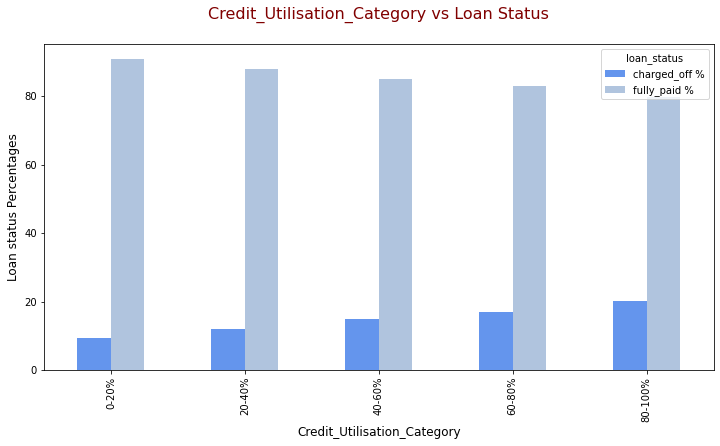

In [57]:
plotter(loan_data.credit_utilisation_category,(12,6),('cornflowerblue','lightsteelblue')) 

#### Observation:
- People who use less credit are safer to disburse money, as they have better repayment ratio.
- Higher credit utilised applicants have higher charge-off ratio

### `emp_exp_in_years` vs `loan_status`

loan_status       charged_off %  fully_paid %
emp_exp_in_years                             
9                 12.92          87.08       
2                 13.22          86.78       
3                 13.85          86.15       
6                 14.18          85.82       
1                 14.30          85.70       
8                 14.31          85.69       
5                 14.39          85.61       
7                 15.44          84.56       
4                 15.73          84.27       
10                15.75          84.25       


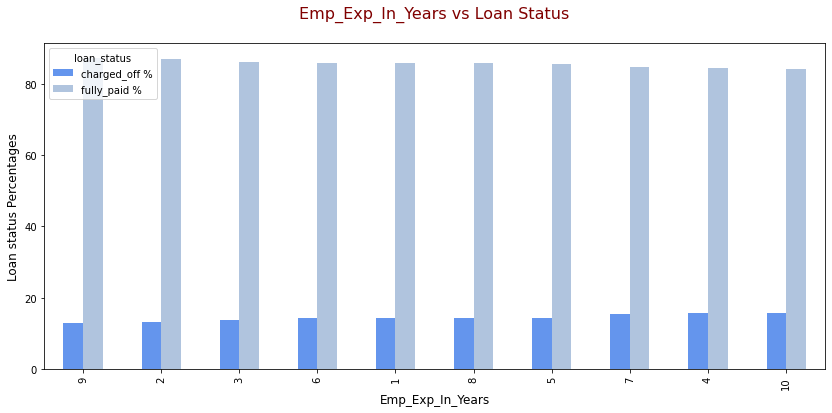

In [58]:
plotter(loan_data.emp_exp_in_years,(14,6),('cornflowerblue','lightsteelblue'))

#### Observation:
- No significant relation between these two variables

### `purpose` vs `loan_status`

loan_status         charged_off %  fully_paid %
purpose                                        
wedding             10.25          89.75       
major_purchase      10.33          89.67       
car                 10.73          89.27       
credit_card         10.77          89.23       
home_improvement    12.08          87.92       
vacation            14.13          85.87       
debt_consolidation  15.36          84.64       
medical             15.73          84.27       
moving              15.96          84.04       
house               16.25          83.75       
other               16.42          83.58       
educational         17.03          82.97       
renewable_energy    19.00          81.00       
small_business      27.39          72.61       


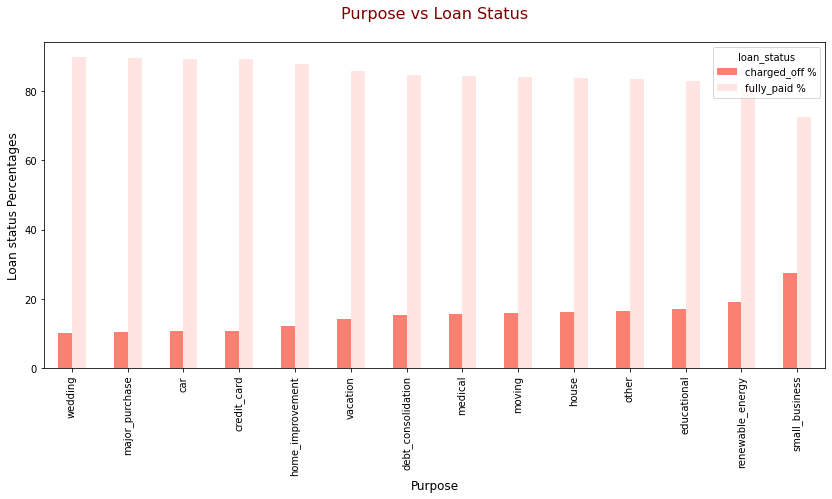

In [59]:
plotter(loan_data.purpose,(14,6),('salmon','mistyrose'))

#### Observation:
- People who take loan for `small business` charged off more than others.
- Wedding, major_purchase, car and credit card purchases has relatively low charge off ratio.

### `term_in_months` vs `loan_status`

loan_status     charged_off %  fully_paid %
term_in_months                             
 36             11.11          88.89       
 60             25.43          74.57       


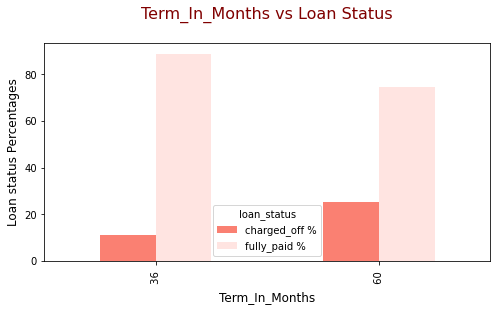

In [60]:
plotter(loan_data.term_in_months,(8,4),('salmon','mistyrose'))

#### Observation:
- Charge off ratio is less if the term period is less i.e upto 36 months.
- Charge off ratio increases with increase in term period of the loan.

It is possibly because, people who opt for longer periods because there loan amount might be higher,
Lets see that in Multivariate analysis.

### `debt_to_income_ratio` vs `loan_status`

loan_status                    charged_off %  fully_paid %
debt_to_income_ratio_category                             
0-5%                           12.24          87.76       
5-10%                          12.86          87.14       
10-15%                         14.57          85.43       
15-20%                         15.77          84.23       
+20%                           16.72          83.28       


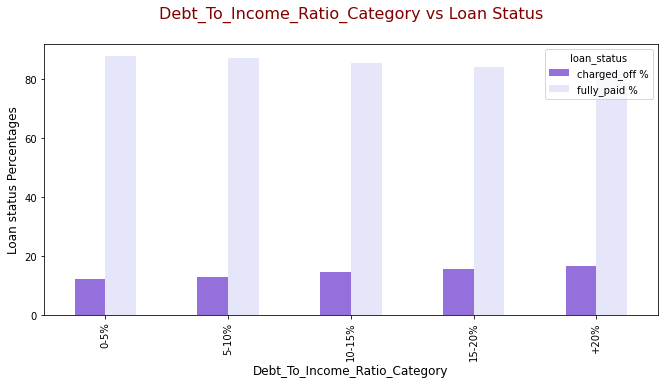

In [61]:
plotter(loan_data.debt_to_income_ratio_category,(11,5),('mediumpurple','lavender'))

#### Observation:
- It can be noticed that individuals with low `debt_to_income_ratio` are better at completing payments to bank

### `pub_rec_bankruptcies` vs `loan_status`

loan_status           charged_off %  fully_paid %
pub_rec_bankruptcies                             
0.0                   14.27          85.73       
1.0                   22.35          77.65       
2.0                   40.00          60.00       


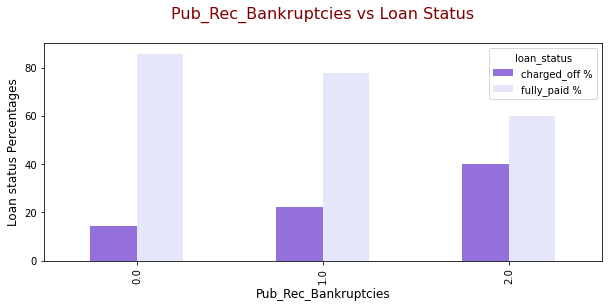

In [62]:
plotter(loan_data.pub_rec_bankruptcies,(10,4),('mediumpurple','lavender'))

#### Observation:
The distribution follows the below logic:
- The applicant with 1/1+ public record bankruptcies has high default ratio.
- We can infer that applicants with more brankruptcy count have higher probability to charge-off.

In [63]:
# we did not perform bivariate analysis with rest of the columns because they are not logical in the business point of view.

##Like there will be no business relation in the month loan is disbursed and loan status.

### With these findings from bivariate analyis, Lets move to Multivariate analysis.


### 5. Multivariate Analysis:


Multivariate analysis involves analyzing multiple variables (more than two) to identify any possible association among them.

In [64]:
safedata.columns #safedata is the deep copy of loan_data which we made earlier before adding category columns.

Index(['loan_amnt', 'funded_amnt_inv', 'term_in_months', 'int_rate', 'grade',
       'sub_grade', 'emp_exp_in_years', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'debt_to_income_ratio', 'credit_utilisation', 'pub_rec_bankruptcies',
       'issued_month', 'issued_year'],
      dtype='object')

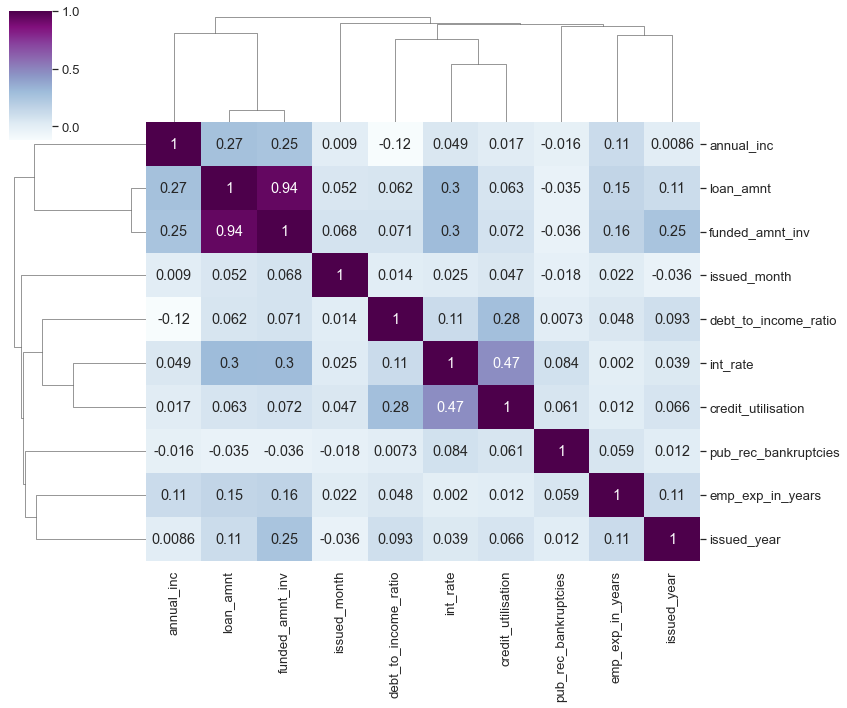

In [65]:
#lets plot a heat map + dendrogram for observing the correlation and observe the heirachical correlations between variables.
sns.set(font_scale=1.2) #fontsize
sns.clustermap(safedata.corr(),annot=True,figsize=(12, 10),cmap="BuPu") #clustermap gives heatmap+dendrogram
plt.show() 

#### Observation:

From the Heat map above we can say that:

1. [emp_exp_in_years, annual_inc] and

2. [debt_to_income_ratio, credit_utilisation, pub_rec_bankruptcies, int_rate] 
   These two groups have correlation at heirachical scale
   Coming to next heirarchy
   
   The above 1&2 group and
   
3. Group [funded_amount_inv, installment] have correlation in overall.


In [66]:
# Lets go ahead and pairplot highly correlated columns.

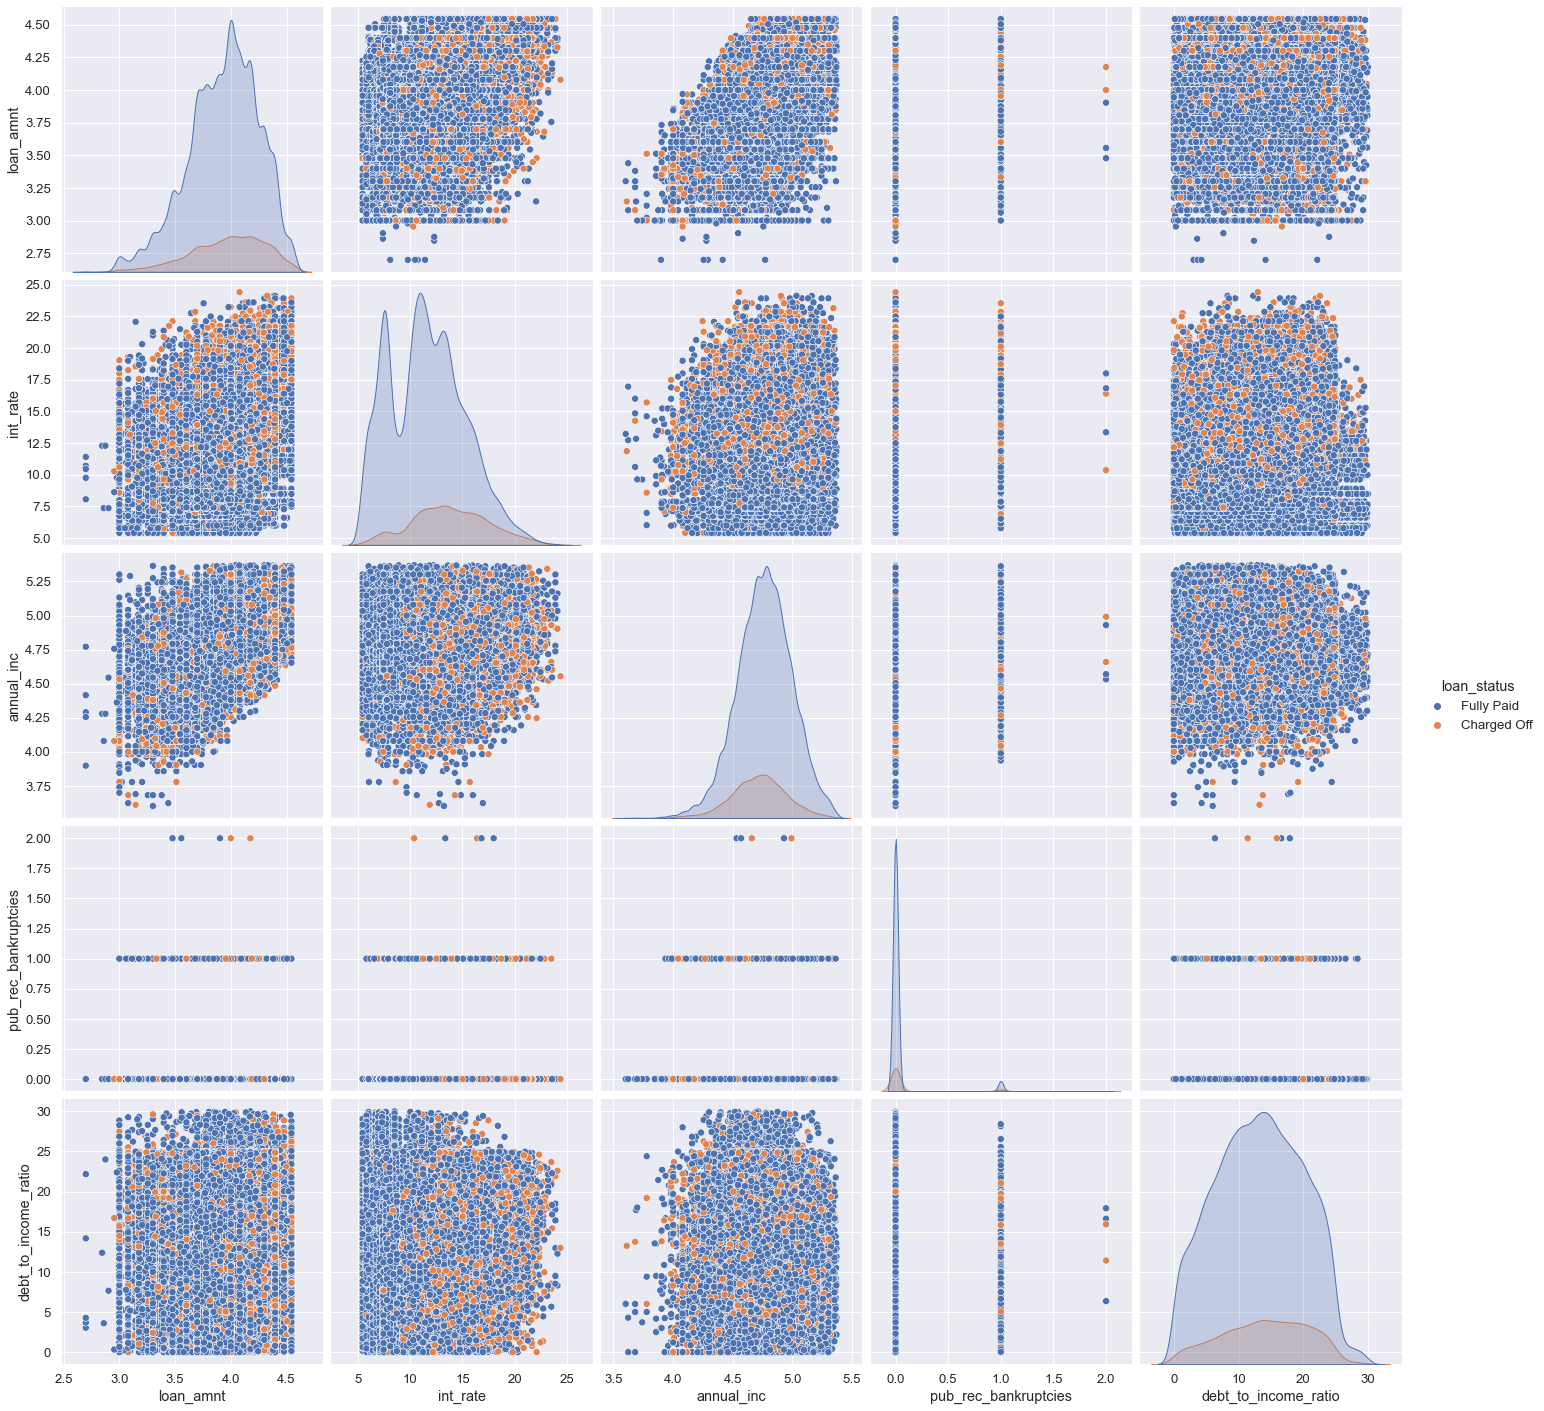

In [67]:
# Creating the pair plot from variables which are important and having corealation.

high_cor_cols = loan_data[['loan_amnt' , 'int_rate', 'annual_inc' , 'pub_rec_bankruptcies',
                           'debt_to_income_ratio' , 'loan_status']]
# lets fill log10 value for loan_amount and annual_inc for better plotting
high_cor_cols['loan_amnt'] = np.log10(high_cor_cols['loan_amnt'])
high_cor_cols['annual_inc'] = np.log10(high_cor_cols['annual_inc'])
#pair plot with loan_status as hue and transparency 1 and size of the markers as 50
sns.pairplot(high_cor_cols, hue = 'loan_status', diag_kind = 'kde',plot_kws = {'alpha': 1, 's': 50, 'edgecolor': 'White'},
             height = 4)
#show the final plot
plt.show()

#### Obervation from the pair plotting:


- If interest rate and loan amount are high the charge-off increases and aditionally if there is a public bankruptcy record       then the charge is even higher.
- If debt-to-income ratio is higher then only people with low interest rates largely paid back the loan whereas
  people who are given loan with higher interest rates charged-off more.
- Lower annual income people with high interest rates charged off more than higher annual income people.

### Insights from our analysis / Driving factors behind loan default:


Our aim is to identify the driver variables or strong indicators of loan default.
Here are the key discoveries that supports our objective.

#### Loan attributes that drive defaulting:
    1. Lending with higher interest rates (above 14) is major factor of default.
    2. Higher loan amount sanctioned is another variable that drives defaulting.
    3. High term period for the loan increases the chance of defaulting.
#### Consumer attributes drive defaulting:
    1. Purpose of loan is small-business or renewable energy then default percent is around whopping 20%.
    2. Public record bankruptcy of the individuals is another factor that is significant, person with 1 record has 
       default percent of 20 and person with 2 or more records has default percent as high as 40.
    3. People with high credit utilisation percent charge off more.
    4. F,G grade people tend to default more.
    5. Lower income people tend to default more if interest rate is higher.
    